# Assignment 2, Q 5
Sagrika Nagar (20171204)

# Q 5 part 1

In [79]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from math import floor
import time

In [83]:
def averaging(im, k):
    h, w = im.shape
#     kernel = np.flip(kernel, 1)
    pad = floor(k/2) 
    if(k%2==0):
        l = pad-1
    else:
        l = pad
            
    out = np.zeros(im.shape)
    im_padded = np.zeros((h + 2*pad, w + 2*pad))
    im_padded[pad:-1*pad, pad:-1*pad] = im
    
    start = time.time()
    kernel = np.ones((k, k))/(k**2)
    for i in range(pad,h+pad): 
        for j in range(pad,w+pad):
            out[i-pad,j-pad]=(kernel*im_padded[i-l:i+pad+1,j-l:j+pad+1]).sum()
    end = time.time()
    t1 = end-start
    return t1, out

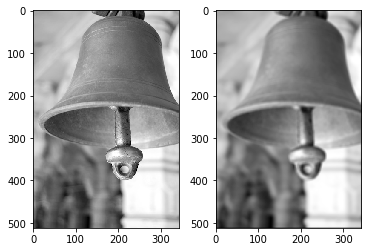

In [84]:
im = cv2.imread("bell.jpg", 0)
t, out = averaging(im, 7)


plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.show()

# Q 5 Part 2

In [85]:
def efficient_mean(im, k):

    pad = floor(k/2)
    if(k%2==0):
        l = pad-1
    else:
        l = pad
    h, w = im.shape
    output = np.zeros(im.shape)
    
    
    
    im_padded = np.zeros((h + 2*pad, w + 2*pad))   
    im_padded[pad:-pad, pad:-pad] = im
    
    start = time.time()
    filt = np.cumsum(im_padded, axis=0)
    filt[k:-1, :]= filt[k:-1, :] - filt[0:-k-1,:]
    filt = np.cumsum(filt, 1)
    filt[:, k:-1] = filt[:, k:-1] - filt[:, 0:-k-1];

    filt = filt / (k**2);
    filt = filt.round();
    output = filt[k-1:-1, k-1:-1];

    end = time.time()
    t2=end-start
    return t2, output

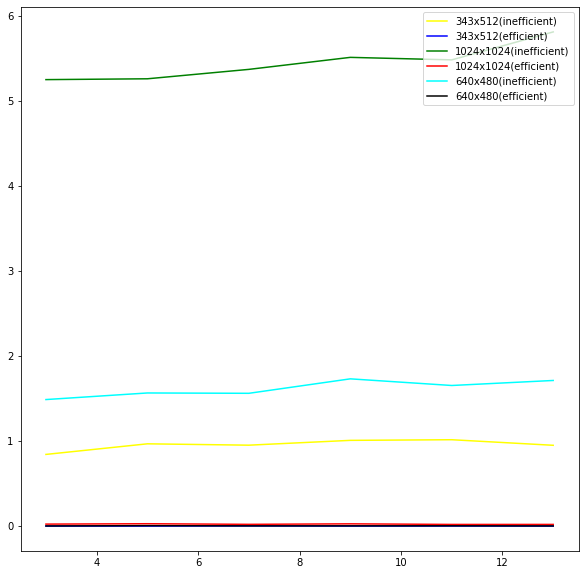

In [103]:
im = cv2.imread("bell.jpg", 0)
nonefficient1 = []
efficient1 = []
for k in range(3, 14, 2):
    t1, out1  = averaging(im, k)
    t2, out2  = efficient_mean(im,k)
    
    nonefficient1.append(t1)
    efficient1.append(t2)

im = cv2.imread("barbara.jpg", 0)
nonefficient2 = []
efficient2 = []
for k in range(3, 14, 2):
    t1, out1  = averaging(im, k)
    t2, out2  = efficient_mean(im,k)
    
    nonefficient2.append(t1)
    efficient2.append(t2)
    
im = cv2.imread("gt_sky.png", 0)
nonefficient3 = []
efficient3 = []
for k in range(3, 14, 2):
    t1, out1  = averaging(im, k)
    t2, out2  = efficient_mean(im,k)
    
    nonefficient3.append(t1)
    efficient3.append(t2)
    
f = plt.subplots(figsize=(10,10))

    
x=range(3,14,2)
plt.plot(x, nonefficient1, color='yellow')
plt.plot(x, efficient1, color='blue')
plt.plot(x, nonefficient2, color='green')
plt.plot(x, efficient2, color='red')
plt.plot(x, nonefficient3, color='aqua')
plt.plot(x, efficient3, color='black')
plt.legend(('343x512(inefficient)', '343x512(efficient)', '1024x1024(inefficient)', '1024x1024(efficient)', '640x480(inefficient)', '640x480(efficient)'), loc='upper right')
plt.show()



# Q5 Part 3

In [113]:
def efficient_median_filter(im, k):
    out = np.zeros(im.shape)
    mid=floor(k/2)
    w, h = im.shape
    start = time.time()
    
    for i in range(w):
        for j in range(h):
            new=[]
            for l in range(k):
                if (j+l-mid)<0 or (j+mid)>h-1:
                    new.append(0)
                elif (i+l-mid < 0) or (i+l-mid)>w-1:
                    for m in range(k):
                        new.append(0)
                else:
                    for n in range(k):
                        new.append(im[i+l-mid, j+n-mid])
            new.sort()
            out[i,j] = new[len(new)//2]
    end = time.time()
    t1 = end-start
    return t1, out

In [114]:
def inefficient_median_filter(im, k):
    w, h = im.shape

    out = np.zeros(im.shape)
    mid = floor(k/2)
    start = time.time()

    for i in range(1, w-1):
        for j in range(1, h-1):

            out[i,j] = np.median(im[i-mid:i+mid+1,j-mid:j+mid+1])

    cv2.normalize(out, out, 0, 255, cv2.NORM_MINMAX, dtype=-1)

    out = out.astype(np.uint8)
    end = time.time()

    t2 = end-start
    return t2, out

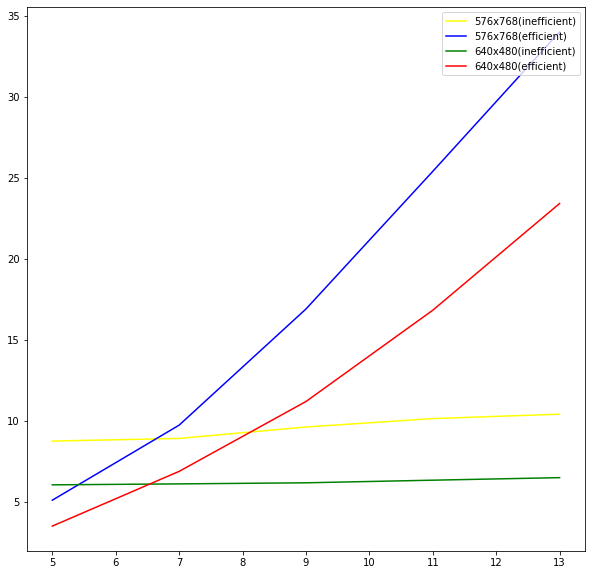

In [115]:
ineff_time1 = []
eff_time1 = []
im = cv2.imread("Degraded.jpg", 0)

for k in range(5,15, 2):    
    t1, out1 = inefficient_median_filter(im, k)
    t2, out2 = efficient_median_filter(im, k)
    ineff_time1.append(t1)
    eff_time1.append(t2)

ineff_time2 = []
eff_time2 = []    
im = cv2.imread("sky.png", 0)

for k in range(5,15, 2):    
    t1, out1 = inefficient_median_filter(im, k)
    t2, out2 = efficient_median_filter(im, k)
    ineff_time2.append(t1)
    eff_time2.append(t2)

f = plt.subplots(figsize=(10,10))

x = range(5,15,2)
plt.plot(x, ineff_time1, color='yellow')
plt.plot(x, eff_time1, color='blue')
plt.plot(x, ineff_time2, color='green')
plt.plot(x, eff_time2, color='red')
plt.legend(('576x768(inefficient)', '576x768(efficient)', '640x480(inefficient)', '640x480(efficient)'), loc='upper right')
plt.show()